In [2]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install scikit-learn==1.3.0

Defaulting to user installation because normal site-packages is not writeable


In [4]:
df= pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
colors=['red','orange','blue']
species=['virginica','versicolor','setosa']

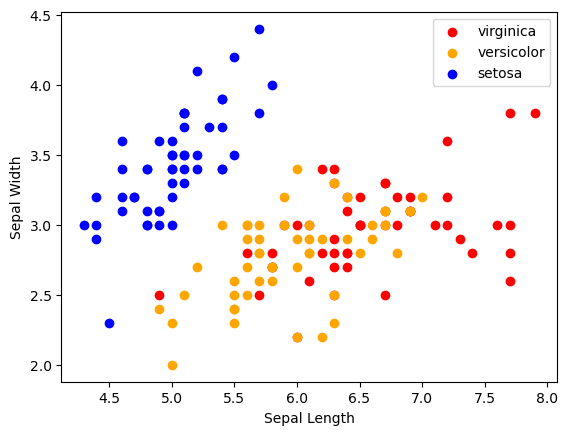

In [11]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

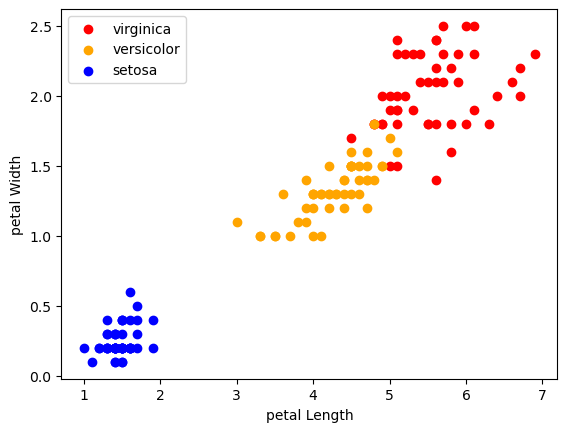

In [12]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()

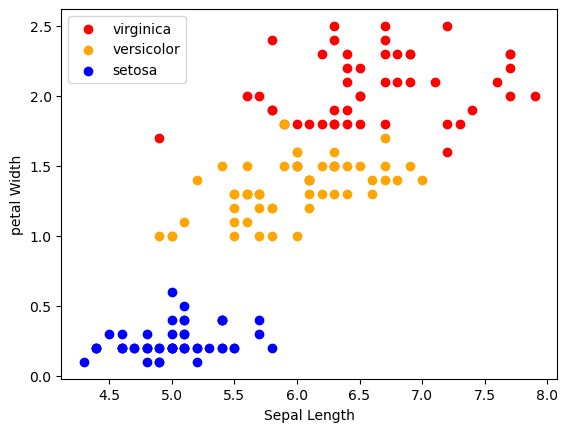

In [13]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("petal Width")
plt.legend()

In [14]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

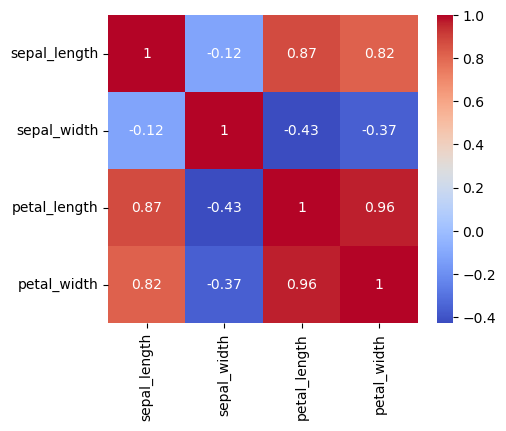

In [15]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
X=df.drop(columns=['species'])
Y=df['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [17]:
model=LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy:",model.score(x_test,y_test)*100)

Logistic Regression Accuracy: 93.33333333333333


In [18]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [19]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 93.33333333333333


In [20]:
model=KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("K-nearest neighbors Accuracy:",model.score(x_test,y_test)*100)

K-nearest neighbors Accuracy: 93.33333333333333


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)
print("Decision Tree Accuracy: ",model.score(x_test,y_test)*100)

Decision Tree Accuracy:  95.55555555555556


In [22]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [23]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [24]:
import pickle
filename='save_model.sav'
pickle.dump(model,open(filename,'wb'))

In [25]:
import pickle

In [26]:
filename='saved_model.sav'
try:
    with open(filename,'wb') as file:
        pickle.dump(model,file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully.


In [27]:
local_model=pickle.load(open(filename,'rb'))

In [28]:
local_model.predict([[6.0,2.2,4.0,1.0]])

array(['versicolor'], dtype=object)

In [29]:
import sklearn
print(sklearn.__version__)

1.3.0
